##### Pneumonia detection  using chest X-ray images


In [1]:
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt  
import math
import seaborn as sns           
import os                       
import cv2                       
from PIL import Image            
from itertools import chain      


In [2]:
base_dir = r"C:\Users\Gadha Suresh\Downloads\archive (5)\chest_xray" 
splits = ["test", "train", "val"]
labels = ["NORMAL", "PNEUMONIA"]

file_paths = []
file_labels = []

for split in splits:
    split_dir = os.path.join(base_dir, split)
    #
    for label in labels:
        label_dir = os.path.join(split_dir, label)
        

        if os.path.exists(label_dir):
          
            for file_name in os.listdir(label_dir):
                
                if os.path.isfile(os.path.join(label_dir, file_name)):
                   
                    file_paths.append(os.path.join(label_dir, file_name))
                    file_labels.append(label)

df = pd.DataFrame({
    "name": file_paths,
    "label": file_labels
})

df.to_csv("pneumonia_dataset.csv", index=False)
print("DataFrame saved as 'pneumonia_dataset.csv'")


DataFrame saved as 'pneumonia_dataset.csv'


In [3]:
df.head()

,name,label
0,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
1,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
2,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
3,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
4,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL


In [4]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(
    df,
    test_size=0.35,  
    stratify=df["label"],
    random_state=42
)

valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.4, 
    stratify=temp_df["label"],
    random_state=42
)
print(f"Train set: {len(train_df)} samples ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation set: {len(valid_df)} samples ({len(valid_df)/len(df)*100:.1f}%)")
print(f"Test set: {len(test_df)} samples ({len(test_df)/len(df)*100:.1f}%)")
print(f"Total: {len(train_df) + len(valid_df) + len(test_df)} samples")

train_df.to_csv("train_split.csv", index=False)
valid_df.to_csv("valid_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)
print("\nSplits saved as 'train_split.csv', 'valid_split.csv', and 'test_split.csv'")

Train set: 3806 samples (65.0%)
Validation set: 1230 samples (21.0%)
Test set: 820 samples (14.0%)
Total: 5856 samples

Splits saved as 'train_split.csv', 'valid_split.csv', and 'test_split.csv'


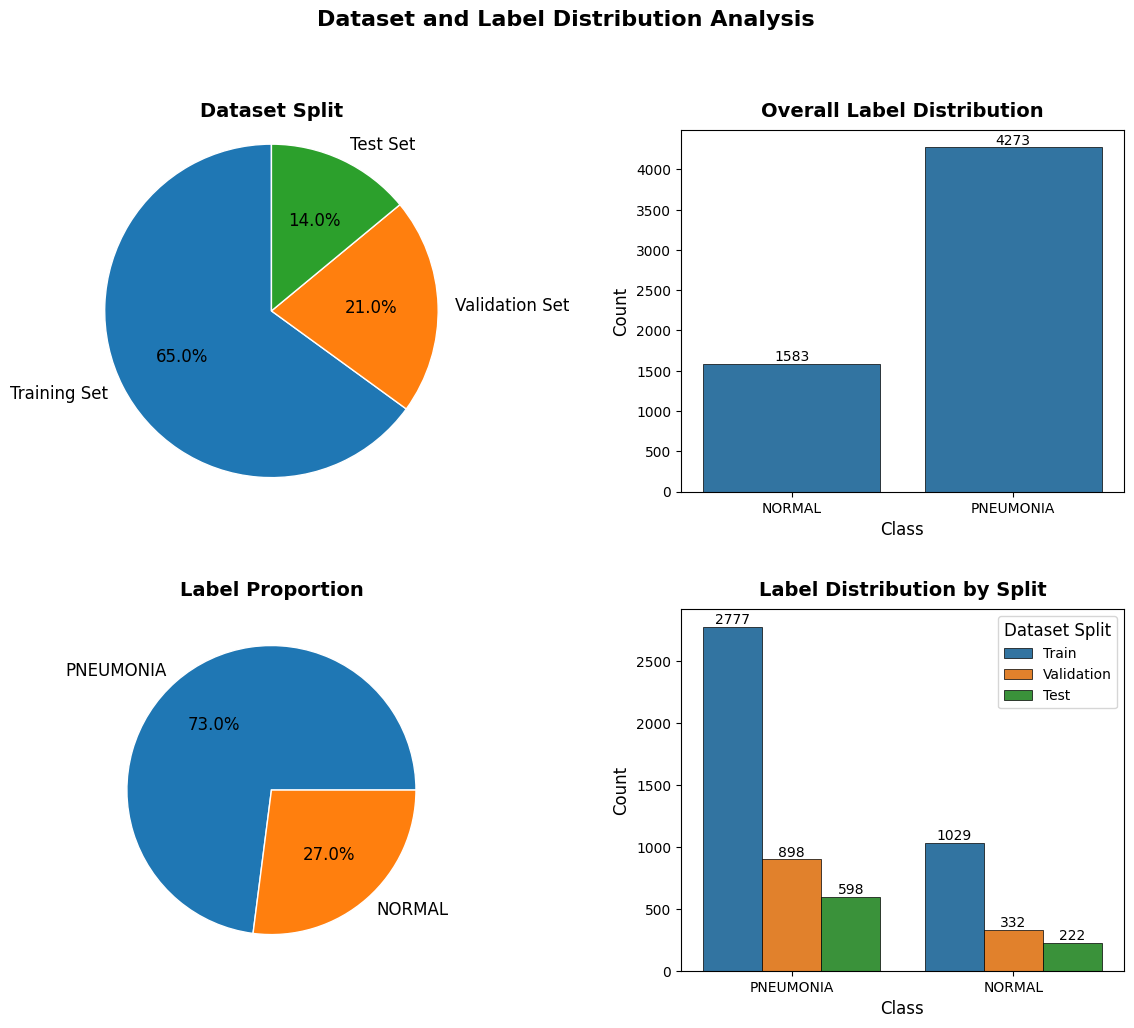

In [5]:

plt.figure(figsize=(12, 10), dpi=100)

# 1. Pie Chart: Dataset Split
plt.subplot(2, 2, 1)
sizes = [len(train_df), len(valid_df), len(test_df)]
labels = ['Training Set', 'Validation Set', 'Test Set']
plt.pie(sizes, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=90, 
        textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Dataset Split', fontsize=14, fontweight='bold', pad=10)
plt.axis('equal')  

# 2. Bar Plot: Overall Label Distribution
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x="label", data=df, edgecolor='black', linewidth=0.5)
for p in ax2.patches:
    height = p.get_height()
    if height > 0: 
        ax2.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.5, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )
plt.title("Overall Label Distribution", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 3. Pie Chart: Label Proportion
plt.subplot(2, 2, 3)
df["label"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", textprops={'fontsize': 12}, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Label Proportion", fontsize=14, fontweight='bold', pad=10)
plt.ylabel("") 

# 4. Grouped Bar Plot: Label Distribution by Split
plt.subplot(2, 2, 4)
combined_df = pd.concat([
    train_df.assign(split="Train"),
    valid_df.assign(split="Validation"),
    test_df.assign(split="Test")
])

# Create the grouped bar plot
ax = sns.countplot(x="label", hue="split", data=combined_df, edgecolor='black', linewidth=0.5)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  #
        ax.text(
            p.get_x() + p.get_width() / 2.,  
            height + 0.5,                     
            f'{int(height)}',            
            ha='center',                     
            va='bottom',                     
            fontsize=10
        )

plt.title("Label Distribution by Split", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Dataset Split", title_fontsize=12, fontsize=10, loc='best')
plt.tight_layout(pad=3.0)
plt.suptitle("Dataset and Label Distribution Analysis", fontsize=16, fontweight='bold', y=1.05)
plt.show()



Normal Samples:


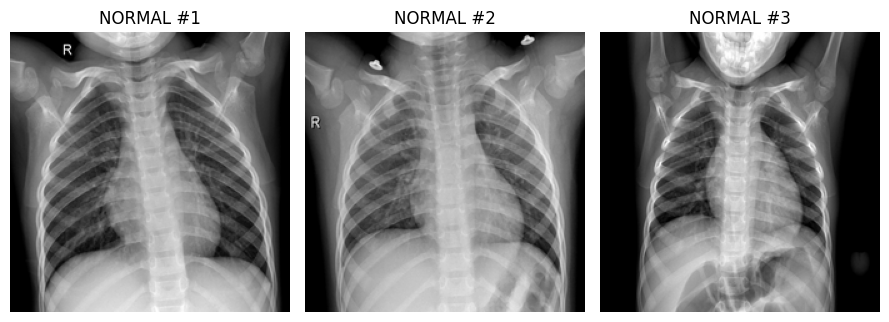


Pneumonia Samples:


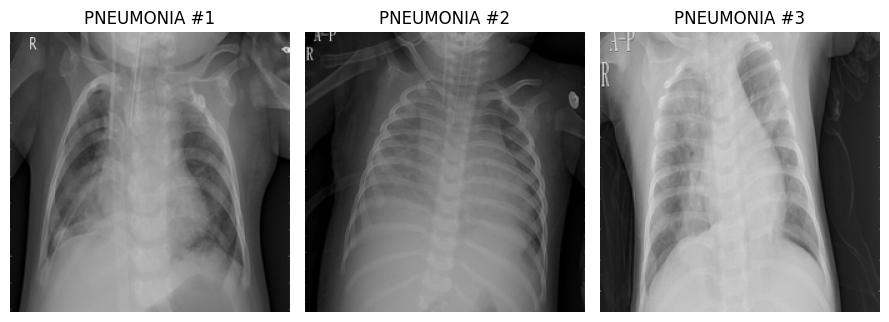

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_sample_images(df, label, num_samples=3, fixed_size=(224, 224)):
    label_df = df[df["label"] == label]
    if len(label_df) == 0:
        print(f"No images found for label '{label}'")
        return
    
    samples = label_df.sample(min(num_samples, len(label_df)))
    plt.figure(figsize=(3 * num_samples, 4))
    
    for i, (idx, row) in enumerate(samples.iterrows()):
        img = Image.open(row["name"])
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize(fixed_size, Image.Resampling.LANCZOS)
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{label} #{i + 1}", fontsize=12)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Assuming train_df is defined
print("\nNormal Samples:")
plot_sample_images(train_df, "NORMAL")

print("\nPneumonia Samples:")
plot_sample_images(train_df, "PNEUMONIA")


In [18]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("pneumonia_dataset.csv")
df['label'] = df['label'].map({'NORMAL': 0, 'PNEUMONIA': 1})  

# Ensure correct image paths
df['name'] = df['name'].apply(lambda x: os.path.join("path_to_images", x)) 

# Feature extraction
def extract_features(image_path, target_size=(64, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Unable to read {image_path}")
        return np.zeros(target_size[0] * target_size[1])  
    img = cv2.resize(img, target_size)
    return img.flatten()

# Extract features
X = np.array([extract_features(img_path) for img_path in df['name']])
y = np.array(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling for ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store accuracies
model_accuracies = {}

# Machine Learning Models
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Training & Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc  # Store accuracy
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Reshape images for CNN
X_train_cnn = X_train.reshape(-1, 64, 64, 1) / 255.0
X_test_cnn = X_test.reshape(-1, 64, 64, 1) / 255.0

# CNN Model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
print("\nTraining CNN...")
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate CNN
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test)
model_accuracies["CNN"] = cnn_acc  # Store CNN accuracy
print(f"\nCNN Accuracy: {cnn_acc:.4f}")




SVM Accuracy: 0.9334
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       317
           1       0.94      0.97      0.96       855

    accuracy                           0.93      1172
   macro avg       0.93      0.90      0.91      1172
weighted avg       0.93      0.93      0.93      1172



C:\Users\Gadha Suresh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       317
           1       0.94      0.98      0.96       855

    accuracy                           0.94      1172
   macro avg       0.93      0.91      0.92      1172
weighted avg       0.94      0.94      0.94      1172


Random Forest Accuracy: 0.9343
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       317
           1       0.94      0.98      0.96       855

    accuracy                           0.93      1172
   macro avg       0.93      0.90      0.91      1172
weighted avg       0.93      0.93      0.93      1172


Training CNN...


C:\Users\Gadha Suresh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.7613 - loss: 0.5061 - val_accuracy: 0.9181 - val_loss: 0.2208
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9176 - loss: 0.1997 - val_accuracy: 0.9420 - val_loss: 0.1596
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9353 - loss: 0.1601 - val_accuracy: 0.9334 - val_loss: 0.2133
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9462 - loss: 0.1356 - val_accuracy: 0.9505 - val_loss: 0.1401
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9536 - loss: 0.1219 - val_accuracy: 0.9539 - val_loss: 0.1228
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9591 - loss: 0.1043 - val_accuracy: 0.9462 - val_loss: 0.1315
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9652 - loss: 0.0995 - val_accuracy: 0.9548 - val_loss: 0.1411
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9577 - loss: 0.1069 - val_acc

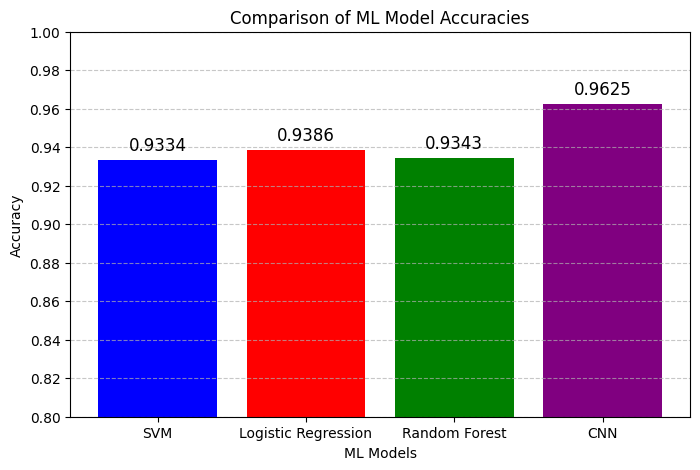

In [19]:
# Function to plot model accuracies
def plot_model_accuracies(model_accuracies):
    plt.figure(figsize=(8, 5))
    models = list(model_accuracies.keys())
    accuracies = list(model_accuracies.values())
    
    colors = ['blue', 'red', 'green', 'purple']
    plt.bar(models, accuracies, color=colors[:len(models)])

    plt.xlabel('ML Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of ML Model Accuracies')
    plt.ylim(0.8, 1)
    plt.yticks(np.arange(0.8, 1.01, 0.02))

    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.005, f'{v:.4f}', ha='center', fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot model accuracies
plot_model_accuracies(model_accuracies)


In [ ]:
y_true = y_test  
y_pred = model.predict(X_test)  

y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]  
plot_confusion_matrix(y_true, y_pred, "Debugging Model")


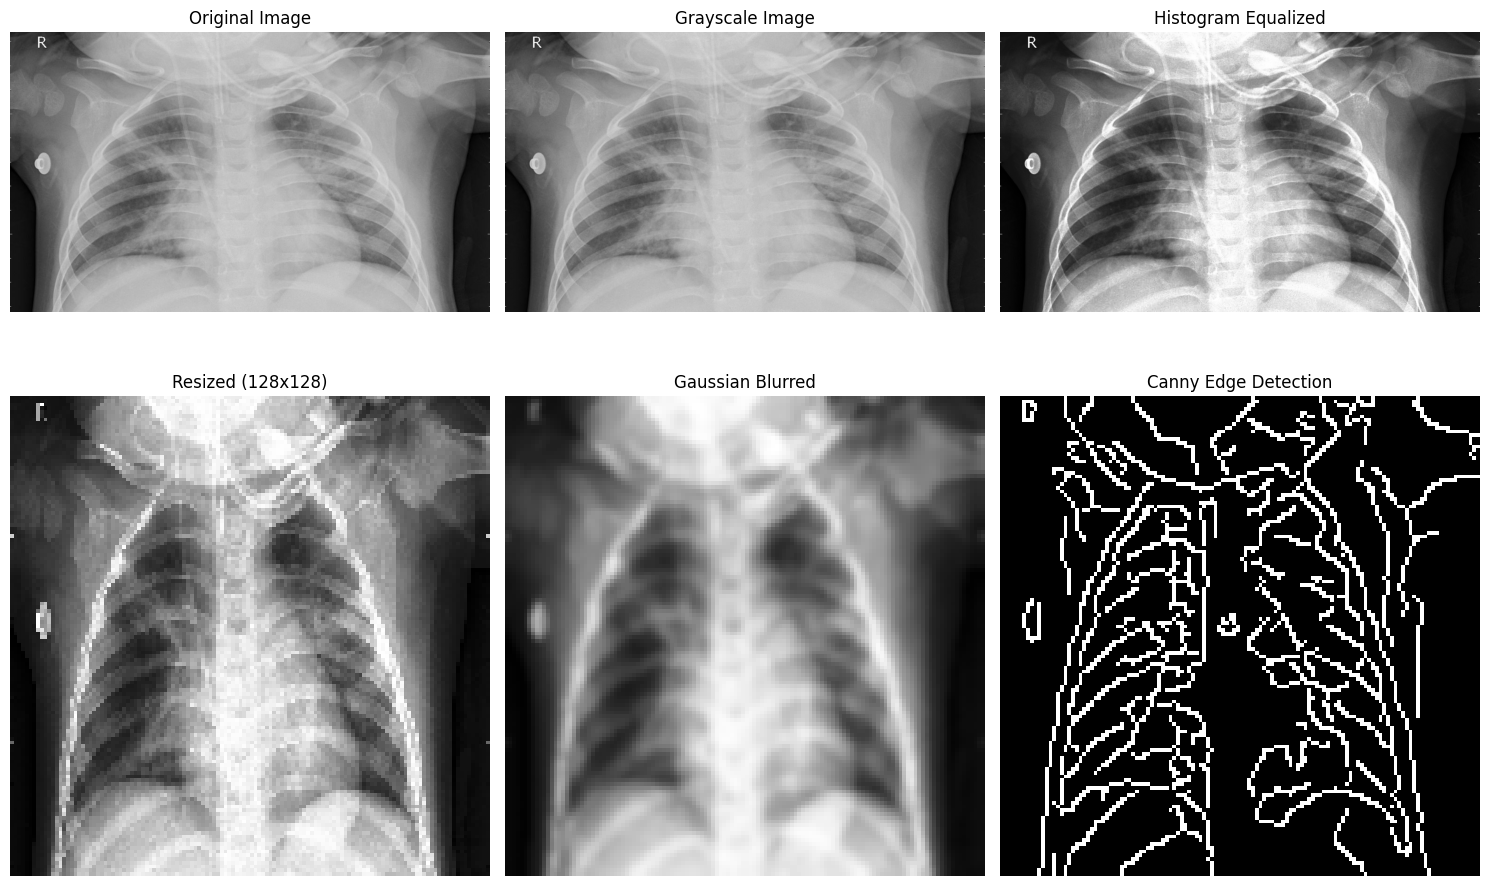

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define function for image preprocessing
def preprocess_image(image_path):
   
    image = cv2.imread(image_path)
    if image is None:
        print(f"⚠️ Error: Could not read the image at {image_path}")
        return None, None, None, None, None
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization (Enhance contrast)
    equalized = cv2.equalizeHist(gray)

    # Resize image to 128x128
    resized = cv2.resize(equalized, (128, 128))

    # Apply Gaussian Blur (to reduce noise)
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    return image, gray, equalized, resized, blurred, edges

image_path = r"C:\Users\Gadha Suresh\Downloads\archive (5)\chest_xray\train\PNEUMONIA\person9_bacteria_40.jpeg"  

image, gray, equalized, resized, blurred, edges = preprocess_image(image_path)

if image is None:
    print("❌ No image to display. Check the image path.")
else:

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(gray, cmap="gray")
    axes[0, 1].set_title("Grayscale Image")
    axes[0, 1].axis("off")

    axes[0, 2].imshow(equalized, cmap="gray")
    axes[0, 2].set_title("Histogram Equalized")
    axes[0, 2].axis("off")

    axes[1, 0].imshow(resized, cmap="gray")
    axes[1, 0].set_title("Resized (128x128)")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(blurred, cmap="gray")
    axes[1, 1].set_title("Gaussian Blurred")
    axes[1, 1].axis("off")

    axes[1, 2].imshow(edges, cmap="gray")
    axes[1, 2].set_title("Canny Edge Detection")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()
